# Predicting stock prices using Linear Regression

## Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import quandl
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16, 10))
plt.rc('lines', markersize=4)

## Configuring the Quandl API 

In [4]:
quandl.ApiConfig.api_key = "zYKEagbEgDjj6wHUzDc3"

## Get SAP stock data

In [5]:
start_date = datetime.date(2010, 3, 20)
end_date = datetime.date.today()

data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)

data.to_csv('sap_stock.csv')

In [6]:
data.head()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2337 entries, 2010-03-22 to 2019-05-31
Data columns (total 10 columns):
Open                     1979 non-null float64
High                     2337 non-null float64
Low                      2337 non-null float64
Close                    2337 non-null float64
Change                   11 non-null float64
Traded Volume            2291 non-null float64
Turnover                 2291 non-null float64
Last Price of the Day    0 non-null object
Daily Traded Units       0 non-null object
Daily Turnover           0 non-null object
dtypes: float64(7), object(3)
memory usage: 200.8+ KB


In [9]:
data.shape

(2337, 10)

In [10]:
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover
count,1979.000000,2337.000000,2337.000000,2337.000000,11.000000,2.291000e+03,2.291000e+03
mean,60.031046,66.011729,64.919358,65.499855,-0.070000,3.116545e+06,1.888720e+08
std,16.856413,20.490958,20.235663,20.380278,0.709761,1.893561e+06,9.776436e+07
min,33.710000,34.200000,32.880000,33.970000,-0.740000,1.884000e+03,1.767350e+05
25%,45.995000,51.820000,50.750000,51.250000,-0.500000,2.069228e+06,1.335714e+08
50%,57.870000,60.590000,59.750000,60.100000,-0.290000,2.697972e+06,1.676520e+08
75%,69.710000,84.460000,83.150000,83.860000,0.085000,3.602048e+06,2.163331e+08
max,100.100000,117.080000,114.100000,116.080000,1.250000,3.645671e+07,1.369431e+09


In [12]:
data.isna().values.any()

True

In [13]:
# Creating a new data frame with only date and closing price
df = pd.DataFrame(data, columns=['Close'])

In [14]:
df = df.reset_index()
df.isna().values.any()

False

## Expore the data

We will look at the movement of the stock over time by plotting Closing price vs Time

/home/ishan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


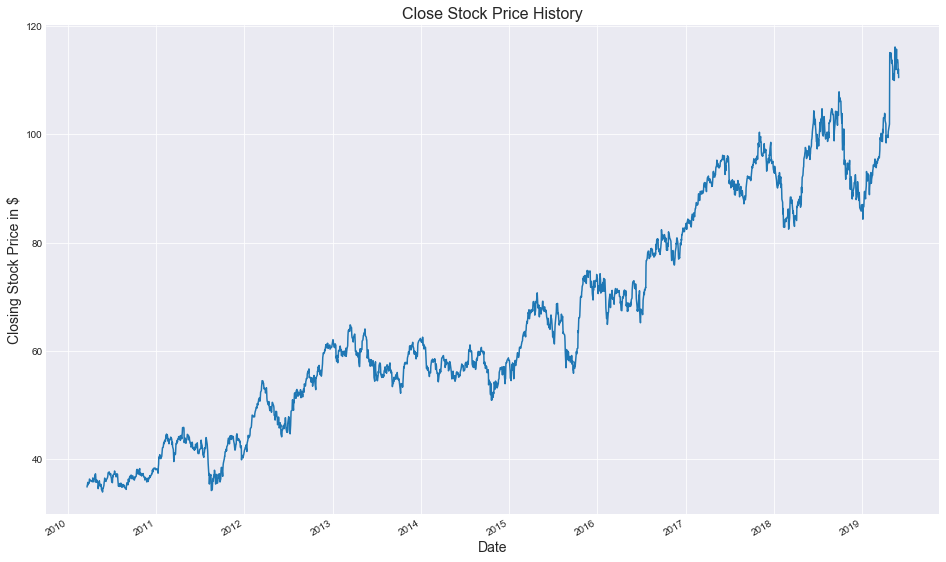

In [15]:

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.title('Close Stock Price History', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()


plt.show()

# Liner Regression

## Training the linear regression model

In [ ]:
# split the data 
train, test = train_test_split(df, test_size = 0.2)

In [17]:
X_train = np.array(train.index).reshape(-1, 1)
Y_train = train['Close']

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
# To get the value of coef (slope) and of intercept (c)
print(regressor.coef_)
print(regressor.intercept_)

[0.02890009]
31.801714032163275


In [23]:
#Testing 

X_test = np.array(test.index).reshape(-1, 1)
Y_test = test['Close']

In [24]:
Y_pred = regressor.predict(X_test)

In [38]:
res_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

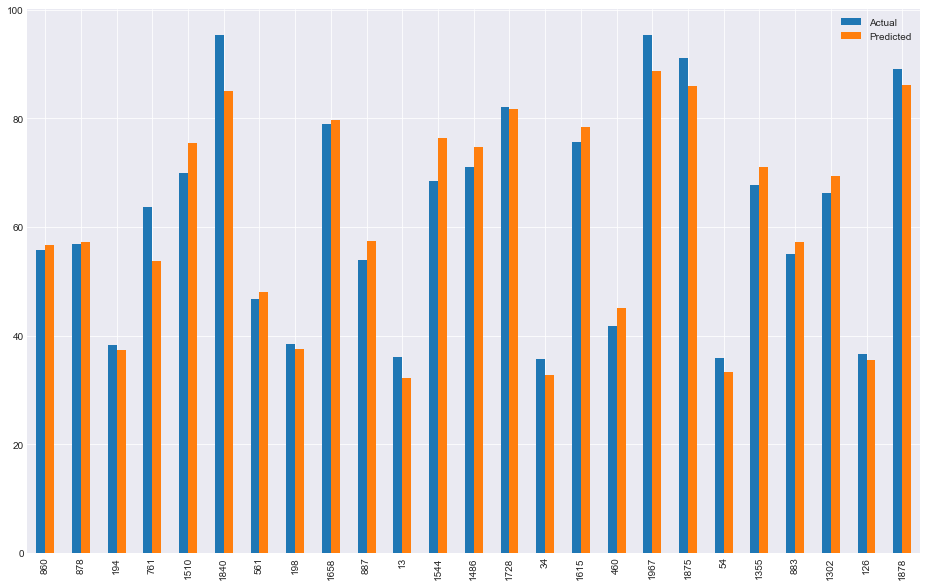

In [34]:
df_visualize = res_df.head(25)
#df_visualize =  df_visualize.reset_index()

df_visualize.plot(kind='bar', figsize=(16, 10))

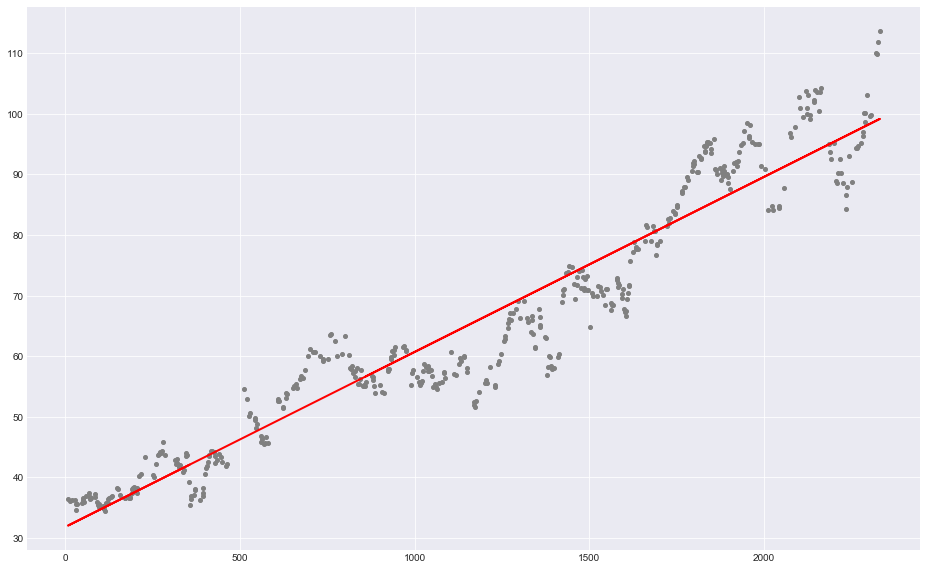

In [35]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

## Error evaluation metrices

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4.565961182595009
Mean Squared Error: 32.383997788875334
Root Mean Squared Error: 5.690693963733715
